# Get Kaggle Kernel Results

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns

from kaggle.api.kaggle_api_extended import KaggleApi

sns.set()

## Connect to Kaggle

In [8]:
api = KaggleApi()
api.authenticate()

## Get Kernels

In [29]:
words = ['arles', 'arose', 'dares', 'lares', 'lores', 'nares',
        'raile', 'raise', 'rales', 'rates', 'reais', 'roate',
        'soare', 'tales', 'tares', 'tores']

algos = ['lf', 'gyx', 'lf-pop']

In [27]:
for algo in algos:
    for word in words:
        kernel_ref = f'chrischow/wordlebot-{algo}-{word}'
        download_path = f'./kernel_output/{algo}/'
        filename = f"wordlebot-{algo if algo != 'gyx' else 'expected_gyx'}-{word}.csv"
        print(f'Checking {algo}-{word}...', flush=True, end='')
        if not filename in os.listdir(download_path):
            if api.kernels_status(kernel_ref)['status'] == 'complete':
                api.kernels_output(kernel_ref, path=download_path)
                print('Downloaded output.')
            else:
                print('Kernel still running. Output not downloaded.')
        else:
            print('Output already downloaded.')

Checking lf-arles...Output already downloaded.
Checking lf-arose...Output already downloaded.
Checking lf-dares...Output already downloaded.
Checking lf-lares...Output already downloaded.
Checking lf-lores...Output already downloaded.
Checking lf-nares...Output already downloaded.
Checking lf-raile...Output already downloaded.
Checking lf-raise...Output already downloaded.
Checking lf-rales...Output already downloaded.
Checking lf-rates...Output already downloaded.
Checking lf-reais...Output already downloaded.
Checking lf-roate...Output already downloaded.
Checking lf-soare...Output already downloaded.
Checking lf-tales...Output already downloaded.
Checking lf-tares...Output already downloaded.
Checking lf-tores...Output already downloaded.
Checking lf-pop-arles...Downloaded output.
Checking lf-pop-arose...Downloaded output.
Checking lf-pop-dares...Downloaded output.
Checking lf-pop-lares...Downloaded output.
Checking lf-pop-lores...Downloaded output.
Checking lf-pop-nares...Downloade

## Get Data

In [37]:
df = pd.DataFrame()

for algo in algos:
    print(f'Loading {algo}...')
    for word in words:
        download_path = f'./kernel_output/{algo}/'
        if algo == 'gyx':
            algo_correct = 'expected_gyx'
        elif algo == 'lf-pop':
            algo_correct = 'lf'
        else:
            algo_correct = algo
        filename = f"wordlebot-{algo_correct}-{word}.csv"
        
        if filename in os.listdir(download_path):
            temp_df = pd.read_csv(f'{download_path}{filename}')
            with open(f"{download_path}wordlebot-{algo}-{word}.log") as f:
                temp_log = f.readlines()
            runtime = pd.DataFrame(eval(''.join(temp_log))).time.iloc[-1]
            temp_results = pd.DataFrame([{
                'Seed Word': word,
                'Ranking Algorithm': algo,
                'Runtime': runtime,
                'Mean Steps': temp_df.steps.mean(),
                'Success Rate': temp_df.steps.le(6).mean(),
                '3-Steps or Less': temp_df.steps.le(3).mean(),
                'Worst Case': temp_df.steps.max()
            }])
            
            df = df.append(temp_results)

Loading lf...
Loading gyx...
Loading lf-pop...


In [39]:
df['steps_rank'] = df['Mean Steps'].rank()
df['success_rank'] = df['Success Rate'].rank(ascending=False)
df['threestep_rank'] = df['3-Steps or Less'].rank(ascending=False)
df['avg_rank'] = df[['steps_rank', 'success_rank', 'threestep_rank']].mean(axis=1)

In [40]:
df.sort_values('avg_rank')

,Seed Word,Ranking Algorithm,Runtime,Mean Steps,Success Rate,3-Steps or Less,Worst Case,steps_rank,success_rank,threestep_rank,avg_rank
0,tores,lf,232.967899,3.730022,0.991793,0.425054,8,1.0,8.0,3.5,4.166667
0,tores,lf-pop,326.544851,3.739957,0.993089,0.423758,8,4.0,4.5,5.0,4.500000
0,tares,lf,225.392809,3.739093,0.991793,0.419438,8,2.0,8.0,7.5,5.833333
0,tares,lf-pop,328.405781,3.750324,0.992657,0.419438,8,8.0,6.0,7.5,7.166667
0,tales,lf,233.820936,3.749028,0.994384,0.395680,8,7.0,1.0,17.0,8.333333
0,arose,lf,223.036801,3.739525,0.990065,0.429806,8,3.0,23.5,2.0,9.500000
0,arose,lf-pop,376.123500,3.748596,0.989201,0.430238,8,6.0,26.0,1.0,11.000000
0,raise,lf,232.002648,3.742549,0.988769,0.425054,9,5.0,28.5,3.5,12.333333
0,tales,lf-pop,278.706187,3.769762,0.993089,0.393521,8,14.0,4.5,20.0,12.833333
0,roate,lf-pop,290.981662,3.765875,0.990929,0.415551,9,12.0,15.0,12.0,13.000000


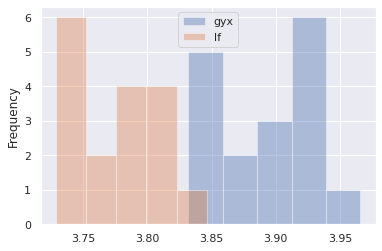

In [28]:
df.groupby('Ranking Algorithm')['Mean Steps'].plot.hist(alpha=0.4, bins=5)
plt.legend()
plt.show()

In [9]:
df.sort_values('Mean Steps').groupby('Ranking Algorithm').first()

,Seed Word,Runtime,Mean Steps,Success Rate,3-Steps or Less,Worst Case,steps_rank,success_rank,threestep_rank,avg_rank
Ranking Algorithm,,,,,,,,,,
gyx,stare,10812.406851,3.831965,0.989201,0.377538,9,17.0,15.5,18.0,16.833333
lf,stare,236.935718,3.728726,0.991793,0.423758,9,1.0,4.5,4.0,3.166667


In [19]:
import statsmodels.api as sm
X = df[['Seed Word', 'Ranking Algorithm']].copy()
X.loc[X['Seed Word'].eq('stare'), 'Seed Word'] = '0stare'
X = pd.get_dummies(X, drop_first=True)
X['const'] = 1.0
y1 = df['Mean Steps']
y2 = df['Success Rate']
y3 = df['3-Steps or Less']

lm1 = sm.OLS(y1, X)
lm2 = sm.OLS(y2, X)
lm3 = sm.OLS(y3, X)

res1 = lm1.fit()
res2 = lm2.fit()
res3 = lm3.fit()

In [20]:
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Mean Steps   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     16.61
Date:                Tue, 01 Feb 2022   Prob (F-statistic):           4.35e-07
Time:                        20:59:29   Log-Likelihood:                 92.513
No. Observations:                  34   AIC:                            -149.0
Df Residuals:                      16   BIC:                            -121.6
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Seed Word_arles          0.0592      0.023      2.549      0.021       0.010       0.108
Seed Word_arose          0.0348      0.023      1.498      0.154      -0.014       0.084
Seed Word_dares          0.1108      0.023      4.773      0.000       0.062       0.160
Seed Word_lares          0.0674      0.023      2.903      0.010       0.018       0.117
Seed Word_lores          0.1073      0.023      4.624      0.000       0.058       0.157
Seed Word_nares          0.0924      0.023      3.982      0.001       0.043       0.142
Seed Word_raile          0.0603      0.023      2.596      0.020       0.011       0.109
Seed Word_raise          0.0475      0.023      2.047      0.057      -0.002       0.097
Seed Word_rales          0.0767      0.023      3.303      0.004       0.027       0.126
Seed Word_rates          0.0536      0.023      2.307      0.035       0.004       0.103
Seed Word_reais          0.0819      0.023      3.526      0.003       0.033       0.131
Seed Word_roate          0.0168      0.023      0.726      0.478      -0.032       0.066
Seed Word_soare          0.0402      0.023      1.731      0.103      -0.009       0.089
Seed Word_tales          0.0123      0.023      0.530      0.603      -0.037       0.062
Seed Word_tares          0.0125      0.023      0.540      0.597      -0.037       0.062
Seed Word_tores          0.0210      0.023      0.903      0.380      -0.028       0.070
Ranking Algorithm_lf    -0.1164      0.008    -14.619      0.000      -0.133      -0.100
const                    3.8385      0.017    227.264      0.000       3.803       3.874
==============================================================================
Omnibus:                       12.548   Durbin-Watson:                   2.157
Prob(Omnibus):                  0.002   Jarque-Bera (JB):                2.683
Skew:                          -0.000   Prob(JB):                        0.262
Kurtosis:                       1.624   Cond. No.                         20.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Success Rate   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     9.123
Date:                Tue, 01 Feb 2022   Prob (F-statistic):           2.81e-05
Time:                        21:00:00   Log-Likelihood:                 183.74
No. Observations:                  34   AIC:                            -331.5
Df Residuals:                      16   BIC:                            -304.0
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Seed Word_arles         -0.0004      0.002     -0.272      0.789      -0.004       0.003
Seed Word_arose         -0.0043      0.002     -2.722      0.015      -0.008      -0.001
Seed Word_dares         -0.0037      0.002     -2.314      0.034      -0.007      -0.000
Seed Word_lares         -0.0013      0.002     -0.817      0.426      -0.005       0.002
Seed Word_lores         -0.0028      0.002     -1.770      0.096      -0.006       0.001
Seed Word_nares         -0.0022      0.002     -1.361      0.192      -0.006       0.001
Seed Word_raile         -0.0060      0.002     -3.811      0.002      -0.009      -0.003
Seed Word_raise         -0.0050      0.002     -3.131      0.006      -0.008      -0.002
Seed Word_rales         -0.0006      0.002     -0.408      0.688      -0.004       0.003
Seed Word_rates         -0.0015      0.002     -0.953      0.355      -0.005       0.002
Seed Word_reais         -0.0045      0.002     -2.859      0.011      -0.008      -0.001
Seed Word_roate         -0.0024      0.002     -1.497      0.154      -0.006       0.001
Seed Word_soare         -0.0054      0.002     -3.403      0.004      -0.009      -0.002
Seed Word_tales          0.0022      0.002      1.361      0.192      -0.001       0.006
Seed Word_tares         -0.0004      0.002     -0.272      0.789      -0.004       0.003
Seed Word_tores         -0.0017      0.002     -1.089      0.292      -0.005       0.002
Ranking Algorithm_lf     0.0052      0.001      9.618      0.000       0.004       0.006
const                    0.9879      0.001    855.677      0.000       0.985       0.990
==============================================================================
Omnibus:                        9.555   Durbin-Watson:                   2.557
Prob(Omnibus):                  0.008   Jarque-Bera (JB):                2.405
Skew:                           0.000   Prob(JB):                        0.300
Kurtosis:                       1.697   Cond. No.                         20.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        3-Steps or Less   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     13.82
Date:                Tue, 01 Feb 2022   Prob (F-statistic):           1.62e-06
Time:                        21:00:01   Log-Likelihood:                 120.07
No. Observations:                  34   AIC:                            -204.1
Df Residuals:                      16   BIC:                            -176.7
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Seed Word_arles         -0.0274      0.010     -2.657      0.017      -0.049      -0.006
Seed Word_arose         -0.0037      0.010     -0.356      0.727      -0.026       0.018
Seed Word_dares         -0.0514      0.010     -4.980      0.000      -0.073      -0.030
Seed Word_lares         -0.0298      0.010     -2.887      0.011      -0.052      -0.008
Seed Word_lores         -0.0464      0.010     -4.498      0.000      -0.068      -0.025
Seed Word_nares         -0.0408      0.010     -3.954      0.001      -0.063      -0.019
Seed Word_raile         -0.0106      0.010     -1.025      0.321      -0.032       0.011
Seed Word_raise         -0.0106      0.010     -1.025      0.321      -0.032       0.011
Seed Word_rales         -0.0350      0.010     -3.390      0.004      -0.057      -0.013
Seed Word_rates         -0.0238      0.010     -2.302      0.035      -0.046      -0.002
Seed Word_reais         -0.0298      0.010     -2.887      0.011      -0.052      -0.008
Seed Word_roate          0.0009      0.010      0.084      0.934      -0.021       0.023
Seed Word_soare         -0.0080      0.010     -0.774      0.450      -0.030       0.014
Seed Word_tales         -0.0173      0.010     -1.674      0.114      -0.039       0.005
Seed Word_tares         -0.0052      0.010     -0.502      0.622      -0.027       0.017
Seed Word_tores         -0.0037      0.010     -0.356      0.727      -0.026       0.018
Ranking Algorithm_lf     0.0434      0.004     12.250      0.000       0.036       0.051
const                    0.3790      0.008     50.455      0.000       0.363       0.395
==============================================================================
Omnibus:                        3.289   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.193   Jarque-Bera (JB):                1.486
Skew:                          -0.000   Prob(JB):                        0.476
Kurtosis:                       1.976   Cond. No.                         20.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
df.groupby('Seed Word')['Ranking Algorithm'].count()

Seed Word
arles    2
arose    2
dares    2
lares    2
lores    2
nares    2
raile    2
raise    2
rales    2
rates    2
reais    2
roate    2
soare    2
stare    2
tales    2
tares    2
tores    2
Name: Ranking Algorithm, dtype: int64

## All Data

In [15]:
if 'Unnamed: 0' in all_data.columns:
    all_data = all_data.drop('Unnamed: 0', axis=1)
all_data['words'] = all_data.words.apply(eval)
all_data['word'] = all_data.words.apply(lambda x: x[0])
all_data['solution'] = all_data.words.apply(lambda x: x[-1])

In [23]:
unsolved = all_data.groupby(['solution', 'method']).steps.mean().reset_index()
unsolved = unsolved.loc[unsolved.steps.gt(6)].sort_values('steps', ascending=False)

In [26]:
pd.options.display.max_rows=100
unsolved.sort_values('solution')

,solution,method,steps
292,baker,gyx,6.117647
317,baste,lf,6.941176
316,baste,gyx,7.235294
318,batch,gyx,7.294118
460,bluer,gyx,6.117647
514,boxer,gyx,7.823529
515,boxer,lf,7.764706
579,brown,lf,6.411765
578,brown,gyx,6.294118
624,buyer,gyx,6.529412


In [1]:
import numpy as np
import pandas as pd
import wordlebot

from wordlebot import Wordle

In [2]:
wordle_candidates, wordle_answers = wordlebot.load_data('data')
wordle = wordle_candidates.loc[
    wordle_candidates.word.apply(lambda x: len(x)==len(set(x)))
].append(wordle_answers).reset_index(drop=True)

word_popularity = wordlebot.load_word_popularity('data')

In [3]:
game = wordlebot.Wordle(wordle, wordle_answers)

In [4]:
game.guess('stare', 'yyxxg')

STARE --> YYXXG: 3 solutions remaining.


In [5]:
game.optimise('ncands')

  0%|          | 0/3 [00:00<?, ?it/s]

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done   9 out of   9 | elapsed:    5.2s finished


,word,ncands_max,ncands_mean,nbuckets,bucket_entropy,ncands_max_rank,ncands_mean_rank,bucket_entropy_rank,avg_rank
0,these,1,1.000000,3,1.098612,1.5,1.5,1.5,1.5
1,those,1,1.000000,3,1.098612,1.5,1.5,1.5,1.5
2,tense,2,1.666667,2,0.636514,3.0,3.0,3.0,3.0


In [6]:
game.reprioritise(data=word_popularity, plugin='popularity')

,word,p0,p1,p2,p3,p4,letter_a,letter_b,letter_c,letter_d,...,letter_s,letter_t,letter_u,letter_v,letter_w,letter_x,letter_y,letter_z,word_freq,n_articles
2,these,t,h,e,s,e,0,0,0,0,...,1,1,0,0,0,0,0,0,215479,175528
0,those,t,h,o,s,e,0,0,0,0,...,1,1,0,0,0,0,0,0,100339,87288
1,tense,t,e,n,s,e,0,0,0,0,...,1,1,0,0,0,0,0,0,1302,934


In [7]:
game.guess('these', 'ggygg')

THESE --> GGYGG: 1 solutions remaining.
Game autosolved. Last guess: THOSE
Game solved in 3 steps.


,word,feedback,n_candidates
0,stare,YYXXG,3
1,these,GGYGG,1
2,those,GGGGG,1
